In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sqa_data_gen.data_extraction import *
from os import listdir
import pandas as pd
from tqdm import tqdm

In [2]:
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

2024-05-01 10:28:04.795820: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 10:28:04.800209: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 10:28:04.863313: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 10:28:05.908146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# data_folder = 'dataset'
# file_list = [ i for i in listdir(data_folder) if '.dat' in i]

data_path = "source_dataset/opportunity/"
file_list = list(listdir(data_path))

In [4]:
file_list

['S1-ADL5.dat',
 'S3-ADL2.dat',
 'S3-ADL1.dat',
 'S2-Drill.dat',
 'S3-ADL5.dat',
 'S1-Drill.dat',
 'S1-ADL3.dat',
 'S1-ADL4.dat',
 'S2-ADL3.dat',
 'S4-ADL2.dat',
 'S3-ADL3.dat',
 'S4-ADL4.dat',
 'S4-ADL5.dat',
 'S2-ADL4.dat',
 'S2-ADL1.dat',
 'S2-ADL5.dat',
 'S4-Drill.dat',
 'S4-ADL1.dat',
 'S4-ADL3.dat',
 'S1-ADL2.dat',
 'S3-Drill.dat',
 'S3-ADL4.dat',
 'S2-ADL2.dat',
 'S1-ADL1.dat']

In [5]:
# train opp classifier on training dataset

file_list = [
    "S1-ADL1.dat",
    "S1-ADL2.dat",
    "S1-ADL3.dat",
    "S1-ADL4.dat",
    "S1-ADL5.dat",
    "S1-Drill.dat",
    "S2-ADL1.dat",
    "S2-ADL2.dat",
    "S2-ADL3.dat",
    "S2-ADL4.dat",
    "S2-ADL5.dat",
    "S2-Drill.dat",
    "S3-ADL1.dat",
    "S3-ADL2.dat",
    "S3-ADL3.dat",
    "S3-ADL4.dat",
    "S3-ADL5.dat",
    "S3-Drill.dat",
]

In [6]:
# label_list

In [7]:
label1 = np.zeros([0, 1])
label2 = np.zeros([0, 1])
data = np.zeros([0, 77])

for file_i in tqdm(file_list):
    label_y, label_list, data_x = extract_data_from_file(
        file_i, datapath=data_path, plot_option=False, show_other=False
    )
    label1 = np.concatenate((label1, label_y[0].reshape([-1, 1])), axis=0)
    label2 = np.concatenate((label2, label_y[1].reshape([-1, 1])), axis=0)
    data = np.concatenate((data, data_x), axis=0)

  0%|          | 0/18 [00:00<?, ?it/s]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


  6%|▌         | 1/18 [00:08<02:29,  8.77s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 11%|█         | 2/18 [00:14<01:50,  6.88s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 17%|█▋        | 3/18 [00:20<01:35,  6.36s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 22%|██▏       | 4/18 [00:25<01:26,  6.15s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 28%|██▊       | 5/18 [00:31<01:16,  5.88s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 33%|███▎      | 6/18 [00:40<01:25,  7.12s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 39%|███▉      | 7/18 [00:47<01:17,  7.06s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 44%|████▍     | 8/18 [00:53<01:05,  6.52s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 50%|█████     | 9/18 [00:59<00:57,  6.41s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 56%|█████▌    | 10/18 [01:05<00:49,  6.21s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 61%|██████    | 11/18 [01:10<00:42,  6.04s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 67%|██████▋   | 12/18 [01:19<00:42,  7.01s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 72%|███████▏  | 13/18 [01:26<00:34,  6.82s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 78%|███████▊  | 14/18 [01:31<00:25,  6.27s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 83%|████████▎ | 15/18 [01:36<00:17,  5.91s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 89%|████████▉ | 16/18 [01:41<00:11,  5.52s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 94%|█████████▍| 17/18 [01:45<00:05,  5.27s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


100%|██████████| 18/18 [01:58<00:00,  6.57s/it]


In [8]:
train_x = data
train_y1 = label1
train_y2 = label2

print(train_x.shape)
print(train_y1.shape)
print(train_y2.shape)

train_y1 = to_categorical(train_y1 - 1, num_classes=len(label_list[0]))
train_y2 = to_categorical(train_y2 - 1, num_classes=len(label_list[1]))
train_x = np.expand_dims(train_x, axis=-1)
train_x = np.expand_dims(train_x, axis=-1)
print("\n")
print(train_x.shape)
print(train_y1.shape)
print(train_y2.shape)

(662467, 77)
(662467, 1)
(662467, 1)


(662467, 77, 1, 1)
(662467, 18)
(662467, 5)


In [9]:
662467 / 30 / 60 / 60  # num of hours for training data

6.133953703703704

# preparing testing data

In [10]:
# train opp classifier on training dataset

test_list = [
    "S4-ADL1.dat",
    "S4-ADL2.dat",
    "S4-ADL3.dat",
    "S4-ADL4.dat",
    "S4-ADL5.dat",
    "S4-Drill.dat",
]

In [11]:
label1 = np.zeros([0, 1])
label2 = np.zeros([0, 1])
data = np.zeros([0, 77])

for file_i in tqdm(test_list):
    label_y, label_list, data_x = extract_data_from_file(
        file_i, datapath=data_path, plot_option=False, show_other=False
    )
    label1 = np.concatenate((label1, label_y[0].reshape([-1, 1])), axis=0)
    label2 = np.concatenate((label2, label_y[1].reshape([-1, 1])), axis=0)
    data = np.concatenate((data, data_x), axis=0)

  0%|          | 0/6 [00:00<?, ?it/s]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 17%|█▋        | 1/6 [00:06<00:34,  6.86s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 33%|███▎      | 2/6 [00:11<00:21,  5.46s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 50%|█████     | 3/6 [00:15<00:14,  4.79s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 67%|██████▋   | 4/6 [00:18<00:08,  4.24s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 83%|████████▎ | 5/6 [00:23<00:04,  4.45s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


100%|██████████| 6/6 [00:30<00:00,  5.15s/it]


In [12]:
test_x = data
test_y1 = label1
test_y2 = label2

print(test_x.shape)
print(test_y1.shape)
print(test_y2.shape)

test_y1 = to_categorical(test_y1 - 1, num_classes=len(label_list[0]))
test_y2 = to_categorical(test_y2 - 1, num_classes=len(label_list[1]))
test_x = np.expand_dims(test_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
print("\n")
print(test_x.shape)
print(test_y1.shape)
print(test_y2.shape)

(190106, 77)
(190106, 1)
(190106, 1)


(190106, 77, 1, 1)
(190106, 18)
(190106, 5)


In [13]:
190106 / 30 / 3600

1.7602407407407408

# Definine neural network

In [14]:
import numpy as np

from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.layers import (
    Dense,
    Activation,
    BatchNormalization,
    Dropout,
    LSTM,
    Flatten,
    Embedding,
    Concatenate,
    concatenate,
    Permute,
    Reshape,
    Convolution2D,
    MaxPooling2D,
    ZeroPadding2D,
    Input
)
from keras.callbacks import ModelCheckpoint


In [15]:
def model_ConvLSTM(
    dim,
    win_len,
    num_classes_1,
    num_feat_map,
    dropout_rate,
    batchnorm=True,
    dropout=True,
):

    model = Sequential(name="ConvLSTM")

    # default data_format for conv2d: channels_last (batch, rows, cols, channels)
    model.add(
        Convolution2D(
            num_feat_map,
            kernel_size=(1, 3),
            activation="relu",
            input_shape=(dim, win_len, 1),
            padding="same",
            name="Conv_1",
        )
    )

    if batchnorm:
        model.add(BatchNormalization(name="Bn_1"))
    #     model.add(MaxPooling2D(pool_size=(1, 2), name='Max_pool_1'))
    if dropout:
        model.add(Dropout(dropout_rate, name="Drop_1"))
    model.add(
        Convolution2D(
            num_feat_map,
            kernel_size=(1, 3),
            activation="relu",
            padding="same",
            name="Conv_2",
        )
    )
    if batchnorm:
        model.add(BatchNormalization(name="Bn_2"))
    #     model.add(MaxPooling2D(pool_size=(1, 2), name='Max_pool_2'))
    if dropout:
        model.add(Dropout(dropout_rate, name="Drop_2"))

    model.add(Permute((2, 1, 3), name="Permute_1"))  # for swap-dimension
    model.add(Reshape((-1, num_feat_map * dim), name="Reshape_1"))
    model.add(LSTM(32, return_sequences=False, stateful=False, name="Lstm_1"))
    #     model.add(Dense(32, activation='tanh', name='dense_1') )
    if dropout:
        model.add(Dropout(dropout_rate, name="Drop_3"))

    model.add(Dense(num_classes_1, activation="softmax", name="dense_out1"))

    return model

In [16]:
dim = test_x.shape[1]
win_len = 1
num_classes_1 = test_y1.shape[1]
num_classes_2 = test_y2.shape[1]
print(dim, num_classes_1, num_classes_2)

num_feat_map = 64
dropout_rate = 0.3

77 18 5


In [17]:
model_1 = model_ConvLSTM(
    dim,
    win_len,
    num_classes_1,
    num_feat_map,
    dropout_rate,
    batchnorm=True,
    dropout=True,
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-05-01 10:30:37.437393: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [18]:
model_1.summary()

Model: "ConvLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bn_1 (BatchNormalization)       │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_1 (Dropout)                │ (None, 77, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 77, 1, 64)      │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bn_2 (BatchNormalization)       │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_2 (Dropout)                │ (None, 77, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Permute_1 (Permute)             │ (None, 1, 77, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_1 (Reshape)             │ (None, 1, 4928)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Lstm_1 (LSTM)                   │ (None, 32)             │       635,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_3 (Dropout)                │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_out1 (Dense)              │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,722 (2.47 MB)

 Trainable params: 648,466 (2.47 MB)

 Non-trainable params: 256 (1.00 KB)

In [19]:
print("model training ...")

model_name = "single_1"

############## training ##############
save_path = "trained_models/opp_model/" + model_name + ".keras"
# es = EarlyStopping(monitor='val_MAE', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint(
    save_path, monitor="val_accuracy", mode="max", verbose=1, save_best_only=True
)

cb_list = [mc]

epochs = 200
batch_size = 300
model_1.compile(loss=categorical_crossentropy, optimizer="adam", metrics=["accuracy"])


print("============ Start Opp Model Training ===========\n")
print("The maximum training epochs is: ", epochs)
H = model_1.fit(
    train_x,
    [train_y1],
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    shuffle=True,
    callbacks=cb_list,
    validation_split=0.2,
)
#                 validation_data=(test_data, test_label))

model training ...
============ Start Opp Model Training ===========

The maximum training epochs is:  200
Epoch 1/200
1766/1767 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7823 - loss: 0.7932
Epoch 1: val_accuracy improved from -inf to 0.72709, saving model to trained_models/opp_model/single_1.keras
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.7824 - loss: 0.7930 - val_accuracy: 0.7271 - val_loss: 0.8616
Epoch 2/200
1765/1767 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8532 - loss: 0.4640
Epoch 2: val_accuracy improved from 0.72709 to 0.75098, saving model to trained_models/opp_model/single_1.keras
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.8533 - loss: 0.4640 - val_accuracy: 0.7510 - val_loss: 0.7788
Epoch 3/200
1766/1767 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8659 - loss: 0.4147
Epoch 3: val_accuracy did not improve from 0.75098
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8659 - loss: 0.4147 - val_accuracy: 0.7500 - val_l

In [20]:
# H.history

In [21]:
y_pred1 = model_1.predict(test_x)

5941/5941 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


In [22]:
y_pred1 = np.argmax(y_pred1, axis=1)
y_true1 = np.argmax(test_y1, axis=1)
cf_matrix = confusion_matrix(y_true1, y_pred1)
print(cf_matrix)
class_wise_f1 = f1_score(y_true1, y_pred1, average=None)
print("the mean-f1 score: {:.4f}".format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true1, y_pred1)
print("accuracy is: {:.4f}".format(accuracy))

[[131313     58    188    205    260    115    385     78    424    699
      69    289     76    486    844   1378   1770    216]
 [   724   1481      0    610      0      0      0      0      0      0
       0      0      0      0      0      0    363      0]
 [   699      0    512      0   1686      0      0      0      0      0
       0      0      0      0      0      0      0      1]
 [   428    156      0   2356      0      0      0      0      0      0
       0      0      0      0      0      0      2      0]
 [   324      5     49     12   2360      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [  2302      0      2      0      0    474    627     87    292    135
      22      6      6     18      0      1      0      5]
 [  2361      0      0      0      0    142   1113     23    258     32
      37      7      3     14      9     11      0     15]
 [  1056      0      0      0      0     17     34    176    594     29
       0   

### 2nd model

In [23]:
# 2nd model
model_2 = model_ConvLSTM(
    dim,
    win_len,
    num_classes_2,
    num_feat_map,
    dropout_rate,
    batchnorm=True,
    dropout=True,
)

model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "ConvLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bn_1 (BatchNormalization)       │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_1 (Dropout)                │ (None, 77, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 77, 1, 64)      │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bn_2 (BatchNormalization)       │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_2 (Dropout)                │ (None, 77, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Permute_1 (Permute)             │ (None, 1, 77, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_1 (Reshape)             │ (None, 1, 4928)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Lstm_1 (LSTM)                   │ (None, 32)             │       635,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_3 (Dropout)                │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_out1 (Dense)              │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,293 (2.47 MB)

 Trainable params: 648,037 (2.47 MB)

 Non-trainable params: 256 (1.00 KB)

In [24]:
print("model training ...")

model_name = "single_2"

############## training ##############
save_path = "trained_models/opp_model/" + model_name + ".keras"
# es = EarlyStopping(monitor='val_MAE', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint(
    save_path, monitor="val_accuracy", mode="max", verbose=1, save_best_only=True
)

cb_list = [mc]


# epochs = 200  # use the one from above
batch_size = 300
model_2.compile(loss=categorical_crossentropy, optimizer="adam", metrics=["accuracy"])


print("============ Start Opp Model Training ===========\n")
print("The maximum training epochs is: ", epochs)
H = model_2.fit(
    train_x,
    [train_y2],
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    shuffle=True,
    callbacks=cb_list,
    validation_split=0.2,
)
#                 validation_data=(test_data, test_label))

model training ...
============ Start Opp Model Training ===========

The maximum training epochs is:  200
Epoch 1/200
1766/1767 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8174 - loss: 0.4789
Epoch 1: val_accuracy improved from -inf to 0.78801, saving model to trained_models/opp_model/single_2.keras
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8174 - loss: 0.4788 - val_accuracy: 0.7880 - val_loss: 0.5236
Epoch 2/200
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8680 - loss: 0.3380
Epoch 2: val_accuracy improved from 0.78801 to 0.78844, saving model to trained_models/opp_model/single_2.keras
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.8680 - loss: 0.3380 - val_accuracy: 0.7884 - val_loss: 0.5436
Epoch 3/200
1765/1767 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8774 - loss: 0.3129
Epoch 3: val_accuracy did not improve from 0.78844
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.8774 - loss: 0.3129 - val_accuracy: 0.7795 - val_l

In [25]:
y_pred2 = model_2.predict(test_x)

5941/5941 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


In [26]:
y_pred2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(test_y2, axis=1)
cf_matrix = confusion_matrix(y_true2, y_pred2)
print(cf_matrix)
class_wise_f1 = f1_score(y_true2, y_pred2, average=None)
print("the mean-f1 score: {:.4f}".format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true2, y_pred2)
print("accuracy is: {:.4f}".format(accuracy))

[[30841  6092  4636  1429   179]
 [ 3919 54504 15565  2335    39]
 [ 1733  4130 35380   264     1]
 [ 1333   503   348 21456   109]
 [  137     0     5   732  4436]]
the mean-f1 score: 0.7992
accuracy is: 0.7712


# loading saved model

In [27]:
save_path

'trained_models/opp_model/single_2.keras'

In [28]:
from keras.models import load_model

model_name = "single_1"
save_path = "trained_models/opp_model/" + model_name + ".keras"
trained_model_1 = load_model(save_path)

model_name = "single_2"
save_path = "trained_models/opp_model/" + model_name + ".keras"
trained_model_2 = load_model(save_path)

# evaluate saved model
y_pred1 = trained_model_1.predict(test_x)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true1 = np.argmax(test_y1, axis=1)
cf_matrix = confusion_matrix(y_true1, y_pred1)
print(cf_matrix)
class_wise_f1 = f1_score(y_true1, y_pred1, average=None)
print("the mean-f1 score: {:.4f}".format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true1, y_pred1)
print("accuracy is: {:.4f}".format(accuracy))


y_pred2 = trained_model_2.predict(test_x)
y_pred2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(test_y2, axis=1)
cf_matrix = confusion_matrix(y_true2, y_pred2)
print(cf_matrix)
class_wise_f1 = f1_score(y_true2, y_pred2, average=None)
print("the mean-f1 score: {:.4f}".format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true2, y_pred2)
print("accuracy is: {:.4f}".format(accuracy))

5941/5941 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
[[130044     73    123    328    428     67    318     39    165    485
     110    324    159    707    958   2230   1994    301]
 [   580   1589      0    840      1      0      0      0      0      0
       0      0      0      0      0      0    168      0]
 [   583      0    533      0   1782      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [   313     97      0   2532      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [   337      2     44     15   2352      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [  2569      0      0      0      0    331    452    102    194    124
      52     74     43     29      7      0      0      0]
 [  2393      0      0      0      0     80   1095     82    159     75
      19     51     10     13     38      6      0      4]
 [   933      0      0      0      0   

In [29]:
# opportunity data ref:
# https://www.mdpi.com/1424-8220/16/1/115
# https://github.com/vikranth94/Activity-Recognition/blob/master/Activity-Recognition.ipynb

# observe the difference between ground truth label vs pseudo label

In [30]:
label_y, label_list, data_x = extract_data_from_file(
    "S1-ADL4.dat", datapath=data_path, plot_option=False, show_other=False
)

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


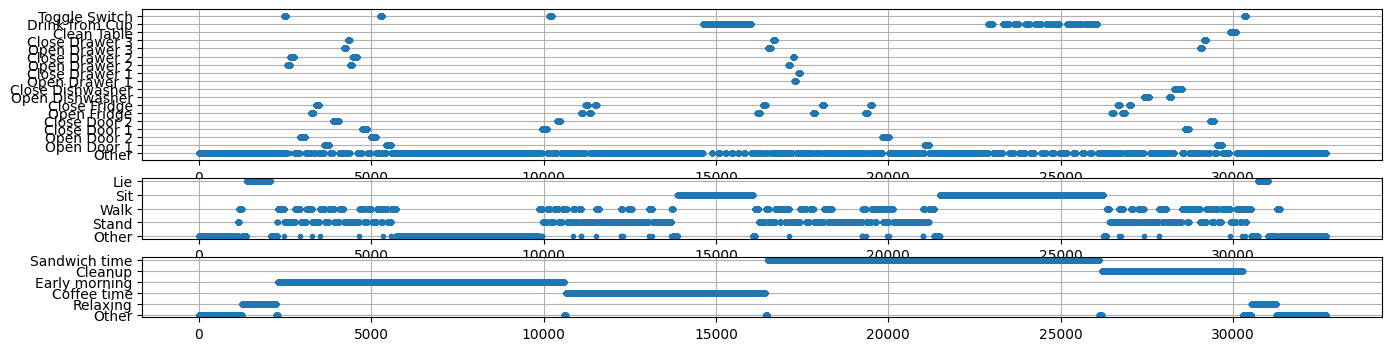

In [31]:
visualize_data_labels(label_y, label_list, show_other=True)

In [32]:
y_pred1 = trained_model_1.predict(test_x)
y_pred2 = trained_model_2.predict(test_x)

y_pred1 = np.argmax(y_pred1, axis=1) + 1
y_pred2 = np.argmax(y_pred2, axis=1) + 1

pseudo_label_y = [y_pred1, y_pred2, label_y[2]]

5941/5941 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
5941/5941 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


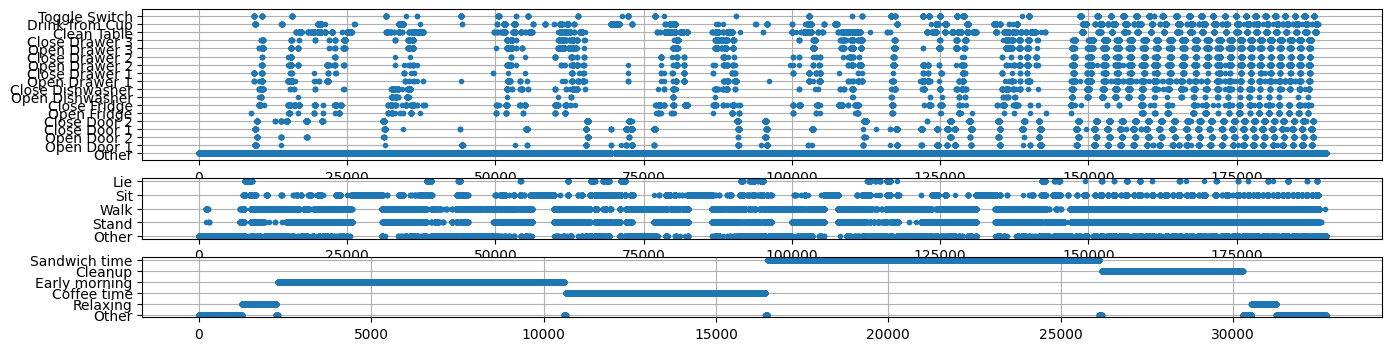

In [33]:
visualize_data_labels(pseudo_label_y, label_list, show_other=True)